In [3]:
import pandas as pd
df_all = pd.read_csv('dataset2001_2024.csv')
df_all

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_KT,CLOUD_AMT,T2M,PS,PW,WD10M,WD50M,WS50M,WS10M,TOA_SW_DNI,QV2M,QV10M
0,2001,1,1,0,0.00,-999.00,-999.00,32.70,18.93,93.39,2.72,140.07,139.57,6.24,4.25,0.00,13.79,13.73
1,2001,1,1,1,0.00,-999.00,-999.00,24.88,18.54,93.40,2.66,138.43,137.82,6.18,4.06,0.00,13.55,13.49
2,2001,1,1,2,0.00,-999.00,-999.00,51.42,18.21,93.36,2.61,138.09,137.45,6.08,3.89,0.00,13.37,13.31
3,2001,1,1,3,0.00,-999.00,-999.00,66.36,17.94,93.31,2.55,137.70,136.99,5.89,3.63,0.00,13.18,13.18
4,2001,1,1,4,0.00,-999.00,-999.00,51.16,17.69,93.27,2.50,137.93,137.20,5.62,3.35,0.00,13.06,13.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,2023,12,31,19,2.92,0.15,0.67,31.79,28.00,93.33,2.72,155.45,154.80,6.44,5.66,1408.66,11.47,11.29
201596,2023,12,31,20,0.80,0.13,0.58,20.45,25.87,93.38,2.70,152.49,152.07,7.36,6.12,1408.61,11.72,11.66
201597,2023,12,31,21,0.05,0.16,0.38,31.40,23.62,93.45,2.70,148.69,148.45,7.88,6.21,1408.76,12.08,12.02
201598,2023,12,31,22,0.00,-999.00,-999.00,21.06,21.87,93.52,2.71,145.60,145.61,7.41,5.61,0.00,12.45,12.39


In [4]:
df= df_all[df_all['YEAR'] == 2001]
df

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_KT,CLOUD_AMT,T2M,PS,PW,WD10M,WD50M,WS50M,WS10M,TOA_SW_DNI,QV2M,QV10M
0,2001,1,1,0,0.00,-999.00,-999.00,32.70,18.93,93.39,2.72,140.07,139.57,6.24,4.25,0.00,13.79,13.73
1,2001,1,1,1,0.00,-999.00,-999.00,24.88,18.54,93.40,2.66,138.43,137.82,6.18,4.06,0.00,13.55,13.49
2,2001,1,1,2,0.00,-999.00,-999.00,51.42,18.21,93.36,2.61,138.09,137.45,6.08,3.89,0.00,13.37,13.31
3,2001,1,1,3,0.00,-999.00,-999.00,66.36,17.94,93.31,2.55,137.70,136.99,5.89,3.63,0.00,13.18,13.18
4,2001,1,1,4,0.00,-999.00,-999.00,51.16,17.69,93.27,2.50,137.93,137.20,5.62,3.35,0.00,13.06,13.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2001,12,31,19,2.17,0.16,0.67,92.43,27.96,92.67,3.15,207.32,210.23,2.95,2.38,1409.43,13.73,12.51
8756,2001,12,31,20,0.52,0.15,0.58,98.20,27.06,92.69,3.22,190.44,192.43,2.90,2.03,1409.47,14.40,13.18
8757,2001,12,31,21,0.02,0.15,0.37,97.80,24.90,92.75,3.30,171.53,172.15,2.97,1.70,1409.43,15.81,14.16
8758,2001,12,31,22,0.00,-999.00,-999.00,97.15,22.76,92.79,3.38,149.52,150.21,3.41,1.89,0.00,15.08,13.98


In [5]:
train_size = 0.8

train_data = df[:int(len(df) * train_size)]
test_data = df[int(len(df) * train_size):]

In [6]:
def create_features(series, n_lags):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i - n_lags:i])
        y.append(series[i])
    return pd.DataFrame(X), pd.Series(y)

In [7]:
n_lags = 100

X_train, y_train = create_features(train_data['T2M'].values, n_lags)

X_test, y_test = create_features(test_data['T2M'].values, n_lags)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  0.5625241746125885


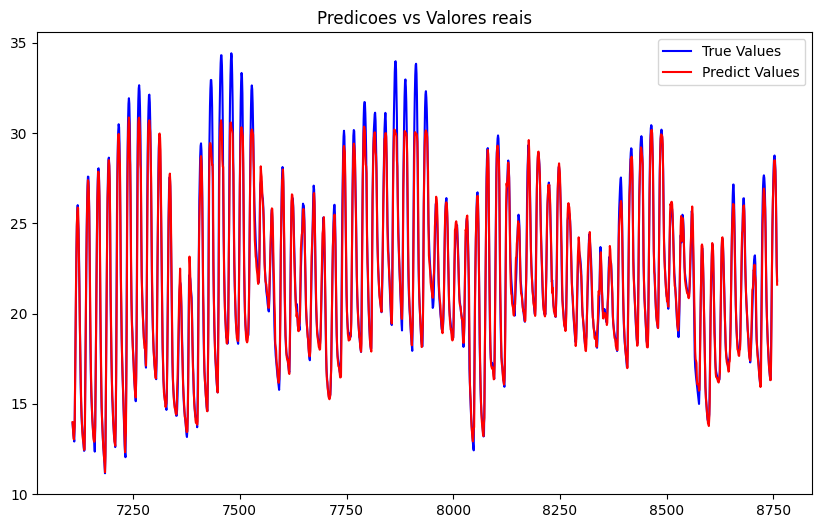

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data.index[n_lags:], y_test, label='True Values', color='blue')
plt.plot(test_data.index[n_lags:], y_pred, label='Predict Values', color='red')
plt.title('Predicoes vs Valores reais')
plt.legend()
plt.show()

In [11]:
def predict_future_points(model, X_test, n_steps):
    """
    Faz predições para múltiplos pontos à frente, iterativamente.
    model: o modelo de machine learning já treinado.
    X_test: o último conjunto de lags usados como input.
    n_steps: o número de pontos futuros que você quer prever.
    """
    predictions = []
    
    # Garantir que estamos pegando a última linha de X_test como um array (convertendo para lista)
    current_input = X_test.iloc[-1].tolist()  # Pega o último conjunto de lags como lista

    for _ in range(n_steps):
        # Prever o próximo valor
        next_pred = model.predict([current_input])[0]  # Prever usando o modelo
        predictions.append(next_pred)
        
        # Atualizar os lags para incluir a nova predição
        current_input = current_input[1:]  # Remove o valor mais antigo
        current_input.append(next_pred)    # Adiciona a nova predição no final
    
    return predictions

# Exemplo de uso: Prever os próximos 5 pontos à frente
n_steps = 5
future_predictions = predict_future_points(model, X_test, n_steps)
print(f'Predicted future points: {future_predictions}')



Predicted future points: [np.float64(21.60490000000001), np.float64(20.847), np.float64(20.246699999999997), np.float64(19.684899999999992), np.float64(19.2951)]


In [12]:
def create_features_multi_step(series, n_lags, n_steps):
    """
    Cria features e múltiplos valores de output (multi-step) a partir da série temporal.
    Cada input terá n_lags valores e cada output terá n_steps valores futuros.
    """
    X, y = [], []
    for i in range(n_lags, len(series) - n_steps + 1):
        X.append(series[i - n_lags:i])
        y.append(series[i:i + n_steps])  # Múltiplos pontos futuros
    return pd.DataFrame(X), pd.DataFrame(y)


In [13]:
# Definir o número de pontos à frente que queremos prever
n_steps = 5

# Transformar os dados de treino e teste para múltiplos pontos futuros
X_train, y_train = create_features_multi_step(train_data['T2M'].values, n_lags, n_steps)
X_test, y_test = create_features_multi_step(test_data['T2M'].values, n_lags, n_steps)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer predições
y_pred = model.predict(X_test)

# Avaliar o modelo para cada ponto à frente
for step in range(n_steps):
    mse_step = mean_squared_error(y_test.iloc[:, step], y_pred[:, step])
    print(f'MSE para o ponto {step+1} à frente: {mse_step}')


MSE para o ponto 1 à frente: 0.9131187286953849
MSE para o ponto 2 à frente: 1.4344947125121317
MSE para o ponto 3 à frente: 2.0740606490776683
MSE para o ponto 4 à frente: 2.7548164004550935
MSE para o ponto 5 à frente: 3.408405317851941


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo: prever os últimos 5 pontos
n_steps = 5

# Obter os últimos valores de teste para comparação
X_test_last = X_test.iloc[-1]  # Pega o último conjunto de lags do conjunto de teste

# Prever os próximos 5 pontos à frente
future_predictions = predict_future_points(model, X_test, n_steps)

# Obter os últimos 5 valores reais de y_test
true_values = y_test[-n_steps:].values

# Plotar os valores reais e previstos
plt.figure(figsize=(10, 6))
plt.plot(range(n_steps), true_values, label='True Values', marker='o', color='blue')
plt.plot(range(n_steps), future_predictions, label='Predicted Values', marker='x', color='red')

# Definir título e rótulos
plt.title('Comparação entre os Valores Reais e Preditos (últimos 5 pontos)')
plt.xlabel('Passos à Frente')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 100) + inhomogeneous part.

: 